# Overview

The goal of this project was to build a **binary classifier** to predict whether a customer would "soon" leave the telcommunications company, SyriaTel.
Using the provided dataset, the following questions were addressed:
* What features are the primary determinants of customer "churn"?
* Are there any predictable patterns?
* How can SyriaTel use these findings to implement cost-effective solutions?

In [1]:
#Binary Classifier: classifying elements into a set of two groups
#What features of the dataset are primary determinants of customer churn and to what extent?
#What are the ways that these findings can be interpreted?
#How can SyriaTel implement cost-effective solutions?
#Best metric: incorrectly classifying a false-negative (type two error) would be worse than incorrectly classifying a false-positive.

## Import Necessary Packages and Inspect the Data:

In [2]:
#Import necessary packages for visualization, scrubbing, and machine learning

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import shap

from sklearn import tree
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

/Users/jessicarodriguez/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Inspect the first 5 rows of data
data = pd.read_csv('bigml_59c28831336c6604c800002a (1).csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Identify the total number of columns and rows
data.shape

(3333, 21)

In [5]:
#Identify and list the names of each column
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

**There are 23 columns in the dataset:**
* State
* Account Length
* Area Code
* Phone Number
* International Plan
* Voice Mail Plan
* Number vmail messages
* Total Day Minutes
* Total Day Calls
* Total Eve Charge
* Total Night Minutes
* Total Night Calls
* Total Night Charge
* Total Intl Minutes
* Total Intl Calls
* Total Intl Charge
* Customer Service Calls
* Churn

"Churn" = a customer leaving SyriaTel.

In [6]:
# Calculate churn rate
count = data['churn'].sum()
print('Count of True values in Churn Column : ', count)

Count of True values in Churn Column :  483


By dividing 483 by the 3,333, we learn the SyriaTel's churn rate is about 14%.

In [92]:
# Calculate average charge per user
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


To find the average charge per user, I added the means for each "charge" column. 30.56 + 17.08 + 9.03 + 2.76 = $59.43

## Data Cleaning

In [8]:
# Identify datatypes
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

"International Plan", "State" and "Voice Mail Plan" are categorical varibles and will need to be transformed.

In [9]:
data.drop('phone number', axis=1, inplace=True)

In [10]:
# Transform categorical variables using one-hot encoding

# Change our "international plan" and "voice mail plan" over to dummies and drop the first variable
categoricals = ['international plan', 'voice mail plan', 'state']

dummies = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

data_preprocessed = data.drop(categoricals, axis=1)

data_preprocessed = pd.concat([data_preprocessed, dummies], axis=1)

data_preprocessed.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Define x and y
x = data_preprocessed.drop(columns='churn')
y = data_preprocessed.churn

In [12]:
# Check the new class sizes
y.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [13]:
x.shape

(3333, 68)

## Perform a Train-Test Split

In [14]:
# Create a train-test split with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Train Set
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set:')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
False    2284
True      382
Name: churn, dtype: int64
Normalized:
False    0.856714
True     0.143286
Name: churn, dtype: float64


Test Set:
False    566
True     101
Name: churn, dtype: int64
Normalized:
False    0.848576
True     0.151424
Name: churn, dtype: float64


## What is the *best metric* to use to maximize the reults?

In statistics, a type I error is a false-positive result, meaning that a null hypothesis is rejected when it is actually true. A  type II error is  a false-negative result, meaning that a null hypethesis is rejeced when it is actually true.

For this project, incorrectly classifying a false-negative (**type II error**) would be *worse* than incorrectly classifying a false-positive. **A false negative would mean that the reality of a customer canceling would have been overlooked**.

My goal is to ***build a classifier that minimizes false negatives***.

## Logistic Regression Model
An **ROC Curve** can be used to show the diagnostic ability of a classification model. This curve plots two parameters: true positive rate and false positive rate.

The **Area Under the ROC Curve (AUC)** evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.

In [16]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

In [17]:
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

AUC: 0.8048315432249937


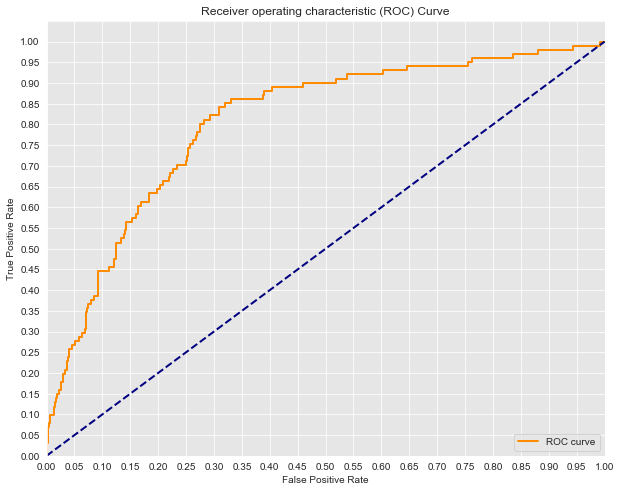

In [18]:
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Initiate Seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC (area under curve)

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
# Create a confustion matrix to measure recall, precision, accuracy, and the AUC-ROC curve
cm = confusion_matrix(y_test, y_pred)
cm

array([[552,  14],
       [ 85,  16]])

In [21]:
# Test recall to predict how good the model is at predicting cancellations (type 2 errors)
recall_score(y_test, y_pred)

0.15841584158415842

.15 recall is low. Other models should be utilized.

## K-Nearest Neightbors Model

In [22]:
# Load classifier and fit data
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [23]:
# Create metric function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.5853658536585366
Recall Score: 0.2376237623762376
Accuracy Score: 0.8590704647676162
F1 Score: 0.3380281690140845


Recall score was only 23%. We need to optimize the model for the best value of k.

In [24]:
# Build function to determine best k value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [25]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.36633663366336633


## Decision Tree Model

In [26]:
SEED = 1

In [27]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [28]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8509691075114579

In [29]:
recall_score(y_test, y_pred)

0.7425742574257426

In [30]:
# Test default settings of decision tree model
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=4,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state= SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [31]:
print('Recall: ', recall_score(y_test, y_pred))

Recall:  0.0


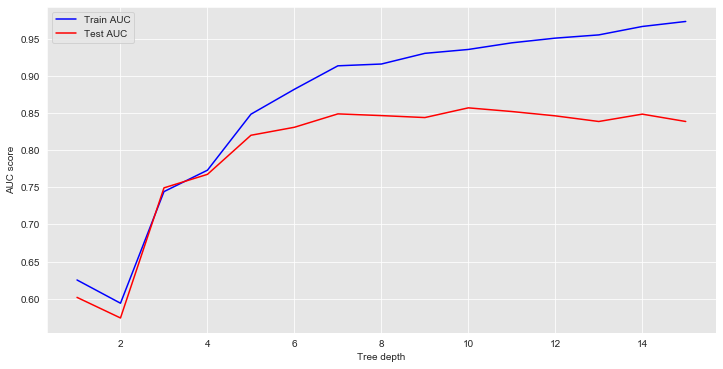

In [32]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

4 is the ideal maximum tree depth. Any greater depth could indicate overfitting (after 4, Train AUC begins riseing above Test AUC).

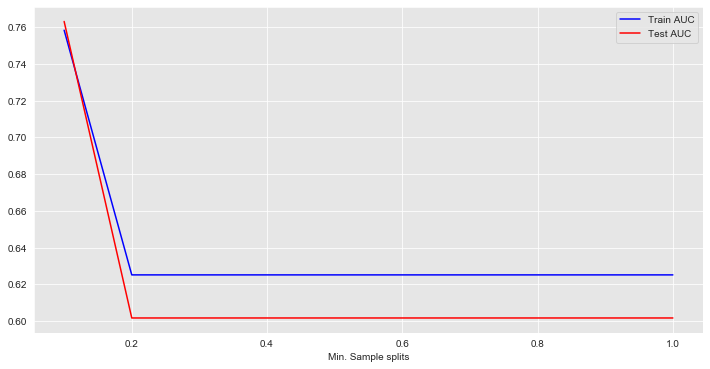

In [33]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

.3 is the ideal sample split for the given data.

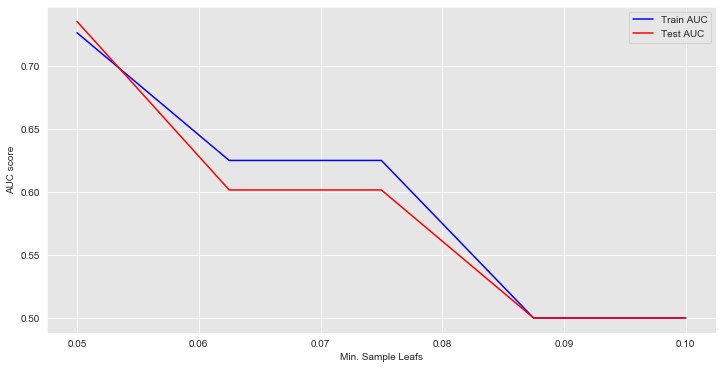

In [34]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.05, .1, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

AUC for Training and test are best at .07. Greater values cause them to separate.

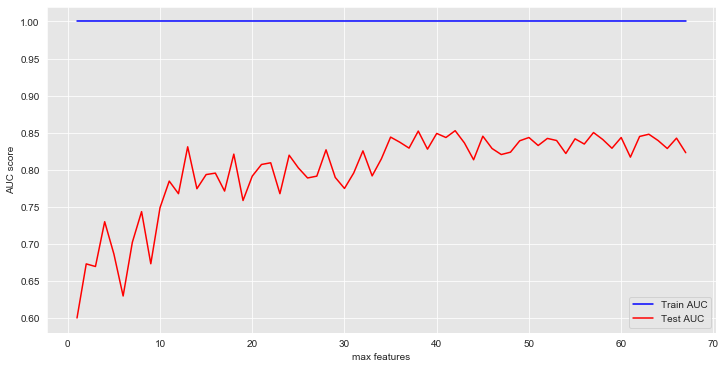

In [35]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The best fit number is 40.

### Retrain the Classifier with Best Values:

In [36]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=40,
                           max_depth=4,
                           min_samples_split=0.8,
                           min_samples_leaf=0.08, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [37]:
recall_score(y_test, y_pred) 

0.0

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



In [39]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 84.86%


## Random Forrest

The ensemble method for decision trees uses Bagging and the Subspace Sampling method to create variance among the trees
For each tree, we sample two-thirds of the training data and the remaining third is used to calculate the out-of-bag error

In [40]:
# Load classifier and fit data
forest = RandomForestClassifier(n_estimators=20, max_depth= 11, random_state = SEED)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
y_pred = forest.predict(X_test)

In [42]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[564   2]
 [ 50  51]]
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       566
        True       0.96      0.50      0.66       101

    accuracy                           0.92       667
   macro avg       0.94      0.75      0.81       667
weighted avg       0.93      0.92      0.91       667



In [43]:
# Get training and testing scores
forest.score(X_train, y_train)

0.9666166541635409

In [44]:
forest.score(X_test, y_test)

0.9220389805097451

In [45]:
# Get recall score
recall_score(y_test, y_pred)

0.504950495049505

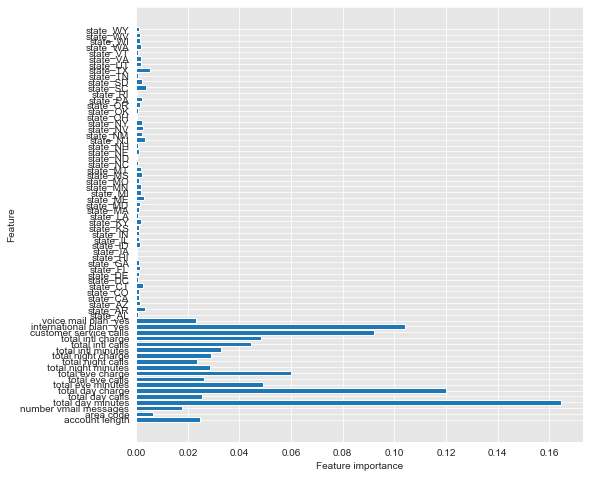

In [46]:
# Plot feature importances on training data
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

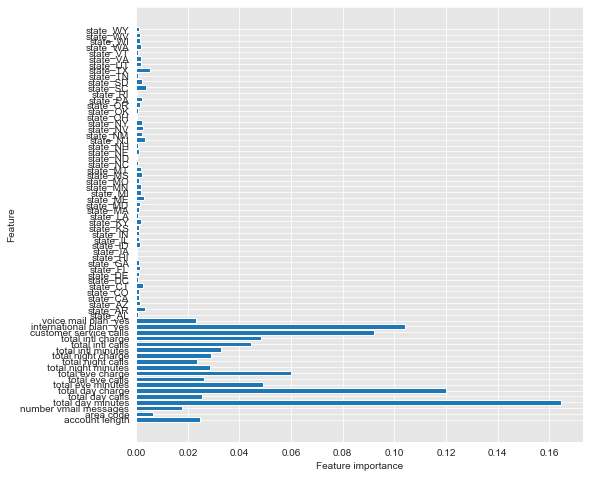

In [47]:
# Plot feature importances on testing data
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_test.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

## Bagged Trees + Decision Tree Model
Decision trees have low bias but high variance, which can lead to overfitting and drastic output changes when small input changes are made.
A bagging classifier can be used to reduce variance in the dataset. 

In [48]:
# Load bagged tree classifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [49]:
# Fit the classifier to the training and testing data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [50]:
# Return the mean accuracy of training set
bagged_tree.score(X_train, y_train)

0.9493623405851462

In [51]:
y_pred = bagged_tree.predict(X_test)

In [52]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[561   5]
 [ 38  63]]
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       566
        True       0.93      0.62      0.75       101

    accuracy                           0.94       667
   macro avg       0.93      0.81      0.85       667
weighted avg       0.94      0.94      0.93       667



In [53]:
# Get recall score
recall_score(y_test, y_pred)

0.6237623762376238

In [54]:
# Optimizing for Entropy (the amount of uncertainty in possible outcomes)
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [55]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [56]:
# Get the recall score for the training and testing data
bagged_tree.score(X_train, y_train)

0.9519879969992499

In [57]:
bagged_tree.score(X_test, y_test)

0.9445277361319341

In [58]:
y_pred = bagged_tree.predict(X_test)

In [59]:
#Print the confision matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[560   6]
 [ 31  70]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



In [60]:
recall_score(y_test, y_pred)

0.693069306930693

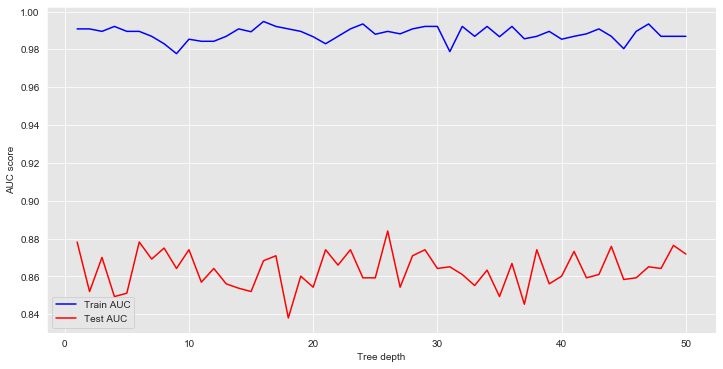

In [61]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state = SEED), n_estimators=20)   
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Greater maximum depth could cause overfitting.

In [62]:
#Load classifier with new maximum depth
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 5), 
                                 n_estimators=20, random_state = SEED)

In [63]:
#Fit classifier to the training and testing data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [64]:
y_pred = bagged_tree.predict(X_test)

In [65]:
# Optimizing the maximum depth for increased recall
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[559   7]
 [ 31  70]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.91      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



In [66]:
recall_score(y_test, y_pred)

0.693069306930693

## Adaboost Model
This will be out first attempts at boosting the data. Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner.
The prediction error in this classification model measures how well the model predicts the variable of a customer churning.

In [67]:
# Load the classifier
adaboost_clf = AdaBoostClassifier(random_state= SEED)

In [68]:
# Fit the classifier to the training and testing data
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [69]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [70]:
# Print training and testing scores

print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.6975806451612904
Recall Score: 0.45287958115183247
Accuracy Score: 0.8934733683420856
F1 Score: 0.5492063492063493


In [71]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.6538461538461539
Recall Score: 0.33663366336633666
Accuracy Score: 0.8725637181409296
F1 Score: 0.4444444444444445


In [72]:
# Print recall score
recall_score(y_test, y_pred)

0.693069306930693

## Gradient Boost Model
This will be the second attempt at boosting the data. Gradient Boost uses the next possible best model combined with previous models to minimize the overall prediction error.
The prediction error in this classification model measures how well the model predicts the variable of a customer churning.

In [73]:
# Load necessary package
gbt_clf = GradientBoostingClassifier(random_state=SEED)

In [74]:
# Fit to training and testing data
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
# Get predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [76]:
# Print training and testing scores
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9967845659163987
Recall Score: 0.8115183246073299
Accuracy Score: 0.9726181545386346
F1 Score: 0.8946608946608947


In [77]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9240506329113924
Recall Score: 0.7227722772277227
Accuracy Score: 0.9490254872563718
F1 Score: 0.8111111111111111


In [78]:
# Get classification report
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



In [79]:
recall_score(y_test, y_pred)

0.693069306930693

## XBoost Model

In [80]:
# Load and fit the XBoost Classifier to the data
# Print recall scores

xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 97.0%
Validation accuracy: 94.75%
Training Recall: 79.84%
Test Recall: 71.29%


In [81]:
# Tune the model with GridsearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [82]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.12%
Validation accuracy: 95.2%
Training Recall: 86.91%
Test Recall: 75.25%


In [83]:
# Increase optimal parameters
xg = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 98.76%
Validation accuracy: 95.05%
Training Recall: 91.36%
Test Recall: 74.26%


In [84]:
# Array of most important features
xg.feature_importances_

array([0.02218809, 0.02421822, 0.06767449, 0.06869283, 0.02302353,
       0.        , 0.05037106, 0.02181236, 0.        , 0.03017147,
       0.02846136, 0.        , 0.05034757, 0.07470229, 0.        ,
       0.10211777, 0.07865135, 0.        , 0.01801524, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02657059,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03195482, 0.        , 0.        , 0.01650081, 0.        ,
       0.03456051, 0.        , 0.01368154, 0.02258129, 0.        ,
       0.        , 0.03002751, 0.        , 0.04293987, 0.        ,
       0.        , 0.        , 0.019353  , 0.        , 0.        ,
       0.        , 0.        , 0.03420692, 0.        , 0.        ,
       0.03060099, 0.        , 0.01883869, 0.01773579, 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

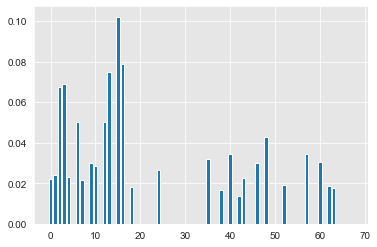

In [85]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

## Best Performing Models
The decision tree with entropy has an acceptable recall score of 74%. The random forest model also has an acceptable recall score of 75%.
I have decided to use the decision tree for further analysis, as I believe the results will be easier to interpret.

In [86]:
SEED = 1

In [87]:
# Load the classifier and fit the data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [88]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8509691075114579

In [89]:
recall_score(y_test, y_pred)

0.7425742574257426

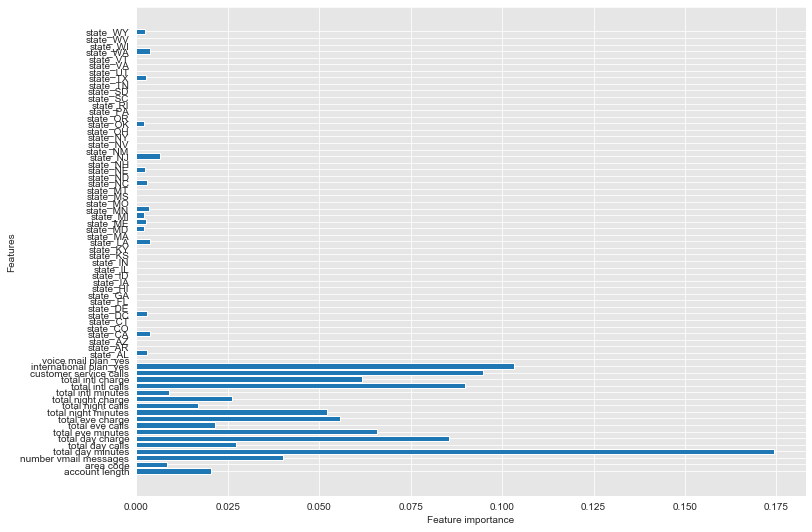

In [90]:
# Plot feature importances on testing data

def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(12,9))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_test.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    
plot_feature_importances(dt)

NameError: name 'model' is not defined

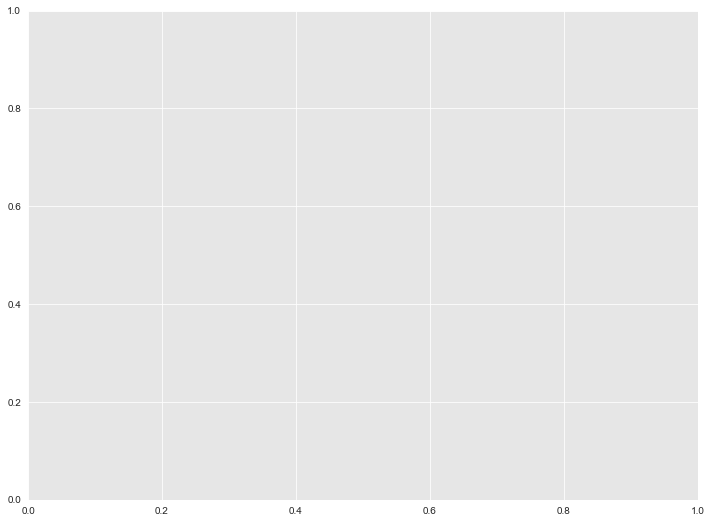

In [91]:
figsize = plt.subplots(figsize = (12, 9))

featues_mask = model.feature_importances_> 0.005

# Specifying the contents of the plot
plt.barh(range(sum(featues_mask)), model.feature_importances_[featues_mask], align = 'center')
plt.yticks(pd.np.arange(sum(featues_mask)), X_train.columns[featues_mask])
plt.xlabel("The degree of importance")
plt.ylabel("Feature")

## Visualize Results of Model using SHAP
SHAPley Additive exPlanations is a tool that creates visualizations for a machine learning model. The resource I used to fit SHAP to my data can be found [HERE](https://anvilproject.org/guides/content/creating-links)

In [ ]:
!pip install shap

In [ ]:
X_display,y_display = shap.datasets.nhanesi(display=True)

In [ ]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10, title="Customer Churn")

In the bar plot above, class 1 (blue) indicates no churn, while class 0 (red) indicates churn.

In [ ]:
# Initiate javascript
shap.initjs()

## Features Contributing to Pushing Model Output
The force plot below allows us to see how features contributed to the model’s prediction for a customer churn. Features pushing the prediction higher are shown in red. Those pushing the prediction lower are in blue. The number associated with the feature shows the value that is impacting churn.

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0], features = X_test.iloc[0])

## Reading the SHAP Value Summary Plot
On the right hand side of the graph, the legend for feature value indicates that RED is HIGH feature value and BLUE is LOW feature value. On the y axis, the features are divided individually.


The x axis at the bottom ranks how significant the impact is.

***If the feature has a tail going to the right, it means that those values are causing an impact on model output that is pushing customer churn from zero (not churning) to one (customer churn).***

In [ ]:
shap.summary_plot(shap_values[1], features=X_test, max_display = 10)

## SHAP Takeaways
According to the visualizations, the following features are the highest contibutors of customer churn:
* Having an international plan
* Total number of day minutes
* High number of customer service calls
* High number of evening minutes

The following features are the lowest contributors of customer churn:
* Number of voicemail messages
* Total internaional calls
* State
* Area code